<font color=#4242f5>
        <h1><center><strong>CME466</strong></center></h1>
        <h1><center><strong>Design of an Advanced Digital System</strong></center></h1>
        <p><center><strong>Department of Electrical and Computer Engineering</strong></center></p>
        <p><center><strong>2024 Winter Term</strong></center></p>
</font>

<h1><font color = #f5bc42><strong>Not at all ...</strong></font></h1>
<div style="text-align:center">
  <img src="../data/really.jpg" alt="Fun Meme">
</div>

<h1> <font color=#ad42f5><strong>Module 3: Object Detection using Histogram of Oriented Gradients (HOG)</strong></font></h1>

<h2><font color=#f542f2><strong>3.1. Using HOG and Dlib (on images)</strong></font></h2>

<h3><font color=#4296f5><strong>3.1.3. Histogram of Oriented Gradients explained using OpenCV</strong></font></h3>
<h4><font color=#42f590><strong>What is a Feature Descriptor?</strong></font></h4>
A feature descriptor is a representation of an image or an image patch that simplifies the image by extracting useful information and throwing away extraneous information.

Typically, a feature descriptor converts an image of size width x height x 3 (channels ) to a feature vector / array of length n. In the case of the HOG feature descriptor, the input image is of size 64 x 128 x 3 and the output feature vector is of length 3780.


This all sounds good, but what is “useful” and what is “extraneous” ? To define “useful”, we need to know what is it “useful” for ? Clearly, the feature vector is not useful for the purpose of viewing the image. But, it is very useful for tasks like image recognition and object detection. The feature vector produced by these algorithms when fed into an image classification algorithms like Support Vector Machine (SVM) produce good results.

But, what kinds of “features” are useful for classification tasks ? Let’s discuss this point using an example. Suppose we want to build an object detector that detects buttons of shirts and coats.

A button is circular ( may look elliptical in an image ) and usually has a few holes for sewing. You can run an edge detector on the image of a button, and easily tell if it is a button by simply looking at the edge image alone. In this case, edge information is “useful” and color information is not. In addition, the features also need to have discriminative power. For example, good features extracted from an image should be able to tell the difference between buttons and other circular objects like coins and car tires.

In the HOG feature descriptor, the distribution ( histograms ) of directions of gradients ( oriented gradients ) are used as features. Gradients ( x and y derivatives ) of an image are useful because the magnitude of gradients is large around edges and corners ( regions of abrupt intensity changes ) and we know that edges and corners pack in a lot more information about object shape than flat regions.

<h4><font color=#42f590><strong>How to calculate Histogram of Oriented Gradients ?</strong></font></h4>
<font color=#f56642><strong>Step 1: Preprocessing</strong></font>

As mentioned earlier HOG feature descriptor used for pedestrian detection is calculated on a 64×128 patch of an image. Of course, an image may be of any size. Typically patches at multiple scales are analyzed at many image locations. The only constraint is that the patches being analyzed have a fixed aspect ratio. In our case, the patches need to have an aspect ratio of 1:2. For example, they can be 100×200, 128×256, or 1000×2000 but not 101×205.

To illustrate this point we have shown a large image of size 720×475. We have selected a patch of size 100×200 for calculating our HOG feature descriptor. This patch is cropped out of an image and resized to 64×128. Now we are ready to calculate the HOG descriptor for this image patch.

<div style="text-align:center">
  <img src="../data/hog_img/origImg.jpg" alt="Original Image">
</div>

<font color=#f56642><strong>Step 2 : Calculate the Gradient Images</strong></font>

To calculate a HOG descriptor, we need to first calculate the horizontal and vertical gradients; after all, we want to calculate the histogram of gradients. This is easily achieved by filtering the image with the following kernels.

<div style="text-align:center">
  <img src="../data/hog_img/gradient-kernels.jpg" alt="Original Image">
</div>

We can also achieve the same results, by using Sobel operator in OpenCV with kernel size 1.

Next, we can find the magnitude and direction of gradient using the following formula

   \begin{align*} g &= \sqrt {g^2_x + g^2_y} \\ \theta &= \arctan \frac{g_y}{g_x} \end{align*} 
If you are using OpenCV, the calculation can be done using the function cartToPolar as well.

The figure below shows the gradients.

<div style="text-align:center">
  <img src="../data/hog_img/gradients.png" alt="Original Image">
    <figcaption><strong>Left</strong> : Absolute value of x-gradient.
        <br>
        <strong>Center</strong> : Absolute value of y-gradient.
        <br>
        <strong>Right</strong> : Magnitude of gradient.</figcaption>
</div>

Notice, the x-gradient fires on vertical lines and the y-gradient fires on horizontal lines. The magnitude of gradient fires where ever there is a sharp change in intensity. None of them fire when the region is smooth. I have deliberately left out the image showing the direction of gradient because direction shown as an image does not convey much.

The gradient image removed a lot of non-essential information ( e.g. constant colored background ), but highlighted outlines. In other words, you can look at the gradient image and still easily say there is a person in the picture.

At every pixel, the gradient has a magnitude and a direction. For color images, the gradients of the three channels are evaluated ( as shown in the figure above ). The magnitude of gradient at a pixel is the maximum of the magnitude of gradients of the three channels, and the angle is the angle corresponding to the maximum gradient.

<font color=#f56642><strong>Step 3 : Calculate Histogram of Gradients in 8×8 cells</strong></font>

In this step, the image is divided into 8×8 cells and a histogram of gradients is calculated for each 8×8 cells.

We will learn about the histograms in a moment, but before we go there let us first understand why we have divided the image into 8×8 cells. One of the important reasons to use a feature descriptor to describe a patch of an image is that it provides a compact representation. An 8×8 image patch contains 8x8x3 = 192 pixel values. The gradient of this patch contains 2 values ( magnitude and direction ) per pixel which adds up to 8x8x2 = 128 numbers.

By the end of this section we will see how these 128 numbers are represented using a 9-bin histogram which can be stored as an array of 9 numbers. Not only is the representation more compact, calculating a histogram over a patch makes this represenation more robust to noise. Individual graidents may have noise, but a histogram over 8×8 patch makes the representation much less sensitive to noise.

<div style="text-align:center">
  <img src="../data/hog_img/hog-cells.png" alt="Hog Cells">
    <figcaption>8×8 cells of HOG. Image is scaled by 4x for display.</figcaption>
</div>

ut why 8×8 patch ? Why not 32×32 ? It is a design choice informed by the scale of features we are looking for. HOG was used for pedestrian detection initially. 8×8 cells in a photo of a pedestrian scaled to 64×128 are big enough to capture interesting features ( e.g. the face, the top of the head etc. ).

The histogram is essentially a vector ( or an array ) of 9 bins ( numbers ) corresponding to angles 0, 20, 40, 60 … 160.

Let us look at one 8×8 patch in the image and see how the gradients look.

<div style="text-align:center">
  <img src="../data/hog_img/hog-cell-gradients-768x432.png" alt="Hog Cell Gradients">
    <figcaption><strong>Center</strong> The RGB patch and gradients represented using arrows.
        <br>
        <strong>Right</strong> The gradients in the same patch represented as numbers</figcaption>
</div>

the image in the center is very informative. It shows the patch of the image overlaid with arrows showing the gradient — the arrow shows the direction of gradient and its length shows the magnitude. Notice how the direction of arrows points to the direction of change in intensity and the magnitude shows how big the difference is.

On the right, we see the raw numbers representing the gradients in the 8×8 cells with one minor difference — the angles are between 0 and 180 degrees instead of 0 to 360 degrees. These are called “unsigned” gradients because a gradient and it’s negative are represented by the same numbers. In other words, a gradient arrow and the one 180 degrees opposite to it are considered the same. But, why not use the 0 – 360 degrees ?

Empirically it has been shown that unsigned gradients work better than signed gradients for pedestrian detection. Some implementations of HOG will allow you to specify if you want to use signed gradients.

The next step is to create a histogram of gradients in these 8×8 cells. The histogram contains 9 bins corresponding to angles 0, 20, 40 … 160. The following figure illustrates the process. We are looking at magnitude and direction of the gradient of the same 8×8 patch as in the previous figure.

A bin is selected based on the direction, and the vote ( the value that goes into the bin ) is selected based on the magnitude. Let’s first focus on the pixel encircled in blue. It has an angle ( direction ) of 80 degrees and magnitude of 2. So it adds 2 to the 5th bin. The gradient at the pixel encircled using red has an angle of 10 degrees and magnitude of 4. Since 10 degrees is half way between 0 and 20, the vote by the pixel splits evenly into the two bins.

<div style="text-align:center">
  <img src="../data/hog_img/hog-histogram-1.png" alt="Histogram of Gradients">
    <figcaption>Histogram of Gradients</figcaption>
</div>

The contributions of all the pixels in the 8×8 cells are added up to create the 9-bin histogram. For the patch above, it looks like this:

<div style="text-align:center">
  <img src="../data/hog_img/histogram-8x8-cell.png" alt="Histogram 8x8 Cells">
    <figcaption></figcaption>
</div>

n our representation, the y-axis is 0 degrees. You can see the histogram has a lot of weight near 0 and 180 degrees, which is just another way of saying that in the patch gradients are pointing either up or down.

<font color=#f56642><strong>Step 4 : 16×16 Block Normalization</strong></font>

In the previous step, we created a histogram based on the gradient of the image. Gradients of an image are sensitive to overall lighting. If you make the image darker by dividing all pixel values by 2, the gradient magnitude will change by half, and therefore the histogram values will change by half.

Ideally, we want our descriptor to be independent of lighting variations. In other words, we would like to “normalize” the histogram so they are not affected by lighting variations.

Before I explain how the histogram is normalized, let’s see how a vector of length 3 is normalized.

<div style="text-align:center">
  <img src="../data/hog_img/hog-16x16-block-normalization.gif" alt="Histogram 8x8 Cells">
    <figcaption></figcaption>
</div>

Let’s say we have an RGB color vector [ 128, 64, 32 ]. The length of this vector is $\sqrt{128^2 + 64^2 + 32^2} = 146.64$. This is also called the L2 norm of the vector. Dividing each element of this vector by 146.64 gives us a normalized vector [0.87, 0.43, 0.22].

Now consider another vector in which the elements are twice the value of the first vector 2 x [ 128, 64, 32 ] = [ 256, 128, 64 ]. You can work it out yourself to see that normalizing [ 256, 128, 64 ] will result in [0.87, 0.43, 0.22], which is the same as the normalized version of the original RGB vector. You can see that normalizing a vector removes the scale.

Now that we know how to normalize a vector, you may be tempted to think that while calculating HOG you can simply normalize the 9×1 histogram the same way we normalized the 3×1 vector above. It is not a bad idea, but a better idea is to normalize over a bigger sized block of 16×16.

A 16×16 block has 4 histograms which can be concatenated to form a 36 x 1 element vector and it can be normalized just the way a 3×1 vector is normalized. The window is then moved by 8 pixels ( see animation ) and a normalized 36×1 vector is calculated over this window and the process is repeated.

<font color=#f56642><strong>Step 5 : Calculate the Histogram of Oriented Gradients feature vector</strong></font>

To calculate the final feature vector for the entire image patch, the 36×1 vectors are concatenated into one giant vector. What is the size of this vector ? Let us calculate

1. How many positions of the 16×16 blocks do we have ? There are 7 horizontal and 15 vertical positions making a total of 7 x 15 = 105 positions.
2. Each 16×16 block is represented by a 36×1 vector. So when we concatenate them all into one gaint vector we obtain a 36×105 = 3780 dimensional vector.

<h4><font color=#42f590><strong>Visualizing Histogram of Oriented Gradients</strong></font></h4>

The HOG descriptor of an image patch is usually visualized by plotting the 9×1 normalized histograms in the 8×8 cells. See image on the side. You will notice that dominant direction of the histogram captures the shape of the person, especially around the torso and legs.

Unfortunately, there is no easy way to visualize the HOG descriptor in OpenCV.

<div style="text-align:center">
  <img src="../data/hog_img/hog-visualization.png" alt="Histogram 8x8 Cells">
    <figcaption></figcaption>
</div>

<h3><font color=#4296f5><strong>3.1.2. Learning Algorithm For Classification</strong></font></h3>

In the previous section, we learned how to convert an image to a feature vector. In this section, we will learn how a classification algorithm takes this feature vector as input and outputs a class label ( e.g. cat or background ).

Before a classification algorithm can do its magic, we need to train it by showing thousands of examples of cats and backgrounds. Different learning algorithms learn differently, but the general principle is that learning algorithms treat feature vectors as points in higher dimensional space, and try to find planes / surfaces that partition the higher dimensional space in such a way that all examples belonging to the same class are on one side of the plane / surface.

To simplify things, let us look at one learning algorithm called Support Vector Machines ( SVM ) in some detail.

<h4><font color=#42f590><strong>How does Support Vector Machine ( SVM ) Work For Image Classification?</strong></font></h4>

Support Vector Machine ( SVM ) is one of the most popular supervised binary classification algorithm. Although the ideas used in SVM have been around since 1963, the current version was proposed in 1995 by Cortes and Vapnik.

In the previous step, we learned that the HOG descriptor of an image is a feature vector of length 3780. We can think of this vector as a point in a 3780-dimensional space. Visualizing higher dimensional space is impossible, so let us simplify things a bit and imagine the feature vector was just two dimensional.

<div style="text-align:center">
  <img src="../data/hog_img/SVM.jpg" alt="SVM" width="600" height="400" >
    <figcaption></figcaption>
</div>

In our simplified world, we now have 2D points representing the two classes ( e.g. cats and background ). In the image above, the two classes are represented by two different kinds of dots. All black dots belong to one class and the white dots belong to the other class. During training, we provide the algorithm with many examples from the two classes. In other words, we tell the algorithm the coordinates of the 2D dots and also whether the dot is black or white.

Different learning algorithms figure out how to separate these two classes in different ways. Linear SVM tries to find the best line that separates the two classes. In the figure above, H1, H2, and H3 are three lines in this 2D space. H1 does not separate the two classes and is therefore not a good classifier. H2 and H3 both separate the two classes, but intuitively it feels like H3 is a better classifier than H2 because H3 appears to separate the two classes more cleanly. Why ? Because H2 is too close to some of the black and white dots. On the other hand, H3 is chosen such that it is at a maximum distance from members of the two classes.

Given the 2D features in the above figure, SVM will find the line H3 for you. If you get a new 2D feature vector corresponding to an image the algorithm has never seen before, you can simply test which side of the line the point lies and assign it the appropriate class label. If your feature vectors are in 3D, SVM will find the appropriate plane that maximally separates the two classes. As you may have guessed, if your feature vector is in a 3780-dimensional space, SVM will find the appropriate hyperplane.

<h4><font color=#42f590><strong>Optimizing SVM</strong></font></h4>

So far so good, but I know you have one important unanswered question. What if the features belonging to the two classes are not separable using a hyperplane ? In such cases, SVM still finds the best hyperplane by solving an optimization problem that tries to increase the distance of the hyperplane from the two classes while trying to make sure many training examples are classified properly. This tradeoff is controlled by a parameter called C. When the value of C is small, a large margin hyperplane is chosen at the expense of a greater number of misclassifications. Conversely, when C is large, a smaller margin hyperplane is chosen that tries to classify many more examples correctly.

Now you may be confused as to what value you should choose for C. Choose the value that performs best on a validation set that the algorithm was not trained on.

<h3><font color=#4296f5><strong>3.1.2. Practical Implementation with OpenCV</strong></font></h3>

In [1]:
# Add the necessary libraries
import dlib
import os
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
# Afunction to display images using OpenCV library
def display_img_cv (img):
    cv.imshow("Original Image", img)
    cv.waitKey (0)
    # simply destroys all the windows we created.
    cv.destroyAllWindows()

In [3]:
# Afunction to display images using matplotlib library
def display_img_plt(img):
    # load image using cv2....and do processing.
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    # as opencv loads in BGR format by default, we want to show it in RGB.

    plt.xticks([]), plt.yticks([])
    plt.show()

image shape: (408, 612, 3)


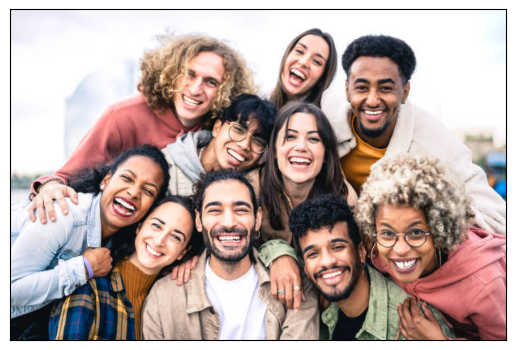

In [4]:
# Load the target image
image_path = os.path.join ('..', 'data', 'people3.jpg')
img = cv.imread (image_path)
print (f"image shape: {img.shape}")

# Displaying the image using Matplotlib library
display_img_plt (img)

In [5]:
# Create a face detctor 
face_detector_hog = dlib.get_frontal_face_detector ()

<div class="alert alert-info"><font color=black>
<strong>There is no need to convert the image to gray scale</strong>
    </font></div>

In [6]:
detections = face_detector_hog (img, 1)

In [7]:
# detections: bounding boxes aroud the faces
print(f"Detections {detections}")
print(f"Number of detected faces: {len(detections)}")

Detections rectangles[[(328, 39) (391, 101)], [(229, 229) (303, 304)], [(328, 142) (391, 205)], [(113, 188) (187, 262)], [(411, 80) (486, 155)], [(197, 66) (259, 129)], [(156, 253) (218, 315)], [(444, 254) (519, 329)], [(353, 271) (428, 345)], [(252, 135) (315, 198)]]
Number of detected faces: 10


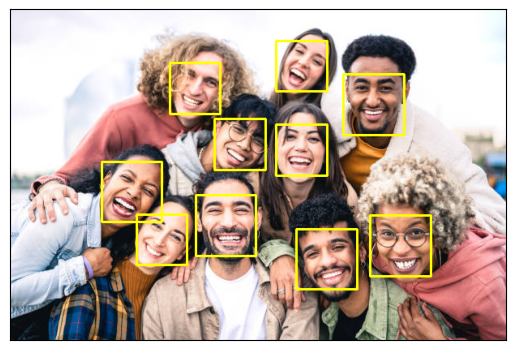

In [8]:
import matplotlib.pyplot as plt

# Drawing a bounding box around detected faces
for face in detections:
    # position of the detected face
    #print(face)
    #print(face.left())
    #print(face.top())
    #print(face.right())
    #print(face.bottom())
    l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
    cv.rectangle (img, (l, t), (r, b), (0, 255, 255), 2)


display_img_plt (img)

<div class="alert alert-info"><font color=black>
<strong>What can we do to improve the results?</strong>
<br>
    
The face detection can be improved by adjusting the parameters:

- **scaleFactor:** Parameter specifying how much the image size is reduced at each image scale. A value of 1.05-1.20 is a good range to balance speed (higher numbers) and accuracy (lower numbers). Raising the value to 1.4+ may start to miss a face that is in between scaling sizes.
- **minNeighbors:** Required neighbors for each candidate rectangle. A higher value means fewer detections but with higher quality. A good range is 3-6.
- **minSize and maxSize:** Minimum and maximum face size in pixels. A good place to start is [30, 30] for the minSize. The default for maxSize is no upper limit.
    </font></div>

<h2><font color=#e1eb34><strong>3.3. Resources</strong></font></h2>

[Histogram of Oriented Gradients explained using OpenCV](https://learnopencv.com/histogram-of-oriented-gradients/)
<br>

<h1><font color = #f5bc42><strong>What do you think?</strong></font></h1>
<div style="text-align:center">
  <img src="../data/backVSreverse.jpg" alt="Fun Meme"  width="800" height="600" >
</div>